In [13]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from tqdm import tqdm,tqdm_gui

Λίγο πιο συμμαζεμένα τα πράγματα.
* Η Συνάρτηση **interaction_prob** επιστρέφει τη πιθανότητα να υπάρχει αλληλεπίδραση συναρτήση της απόστασης που διανύει το φωτόνιο:
$$
\text{interaction_prob}(L)=1-3^{-n\sigma L}
$$

* Η Συνάρτηση **examine_photon** επιστρέφει για το φωτόνιο i τη κίνηση που έκανε στο χώρο μαζι με τη προβολή της κίνησης στα xy,xz,yz καθώς και τις ελεύθερες διαδρομές του φωτονίου και μέσο όρο αυτών. Η συνάρτηση μπορεί να χρησιμοποιηθεί μόνο αν έχουμε πει στη **MonteCarlo3D** να κρατάει τα δεδομένα θέσης για το κάθε φωτόνιο, Προφανώς αυτό συμβαίνει μόνο για να ενδεικτικούς λόγους για λίγα φωτόνια, λόγο τεράστιου όγκου δεδομένων. 

* Η Συνάρτηση **Results** επιστρέφει στατιστικά στοιχεία για τα φωτόνια: Μέσο αριθμό αλληλεπιδράσεων, μέση τιμή των μέσων ελευθέρων διαδρομών, αριθμό φωτονίων που δραπέτευσαν καθώς και τα ιστογράμματα των αποτελεσμάτων. Στο πρώτο ιστόγραμμα βλέπουμε τον αριθμό των φωτονίων που απορροφήθηκαν (με τιμή 0, των φωτονίων που αλληλεπίδρασαν έστω και μια φορά (με τιμή 0.5) και των φωτονίων που διεφυγαν ανεπηρέαστα (με τιμή 1.0).
Στο δεύτερο ιστόγραμμα έχουμε τη κατανόμη των μέσω ελευθερων διαδρομών.

* Η Συνάρτηση **MonteCarlo3D** είναι η υλοποίηση του αλγορίθμου. Δέχεται σαν δεδομένα:
    1. τον αριθμό των φωτονίων (size)
    2. την αριθμηική πυκνότητα των σκεδαστών (n=1)
    3. την ενεργό διατομή των σκεδαστών (sigma=0.1)
    4. την πιθανότητα κατα μια αλληλεπίδραση να υπάρξη απορρόφηση (absorption_prob=0.1)
    5. την ακτινα του αστέρα (R=30)
    6. μια παράμετρο για να διατηρήση τη θέση των φωτονίων ετσι ώστε να τα μελετήσουμε με τη **examine_photon** (draw_photon=False)
    7. μια παράμετρο για να εκτυπώνει για το κάθε φωτόνιο τη θέση του (Verbatim=False)

    Ο αλγόριθμος εκτελεί τα εξής βήματα:
     Για κάθε φωτόνιο i
        1. Υπολογίζουμε τη θεωρητική μέση ελεύθερη διαδρομή και διαμερίζουμε τη κίνηση του φωτονίου σε διαστήματα $\delta L = 0.1 \lambda $ 
        2. Ορίζουμε αρχική θέση (x,y,z)=(0,0)
        3. Ορίζουμε τις αρχικές γωνίες κίνησης phi=2.*np.pi*rnd.rand() και theta=2.*np.pi*rnd.rand()
        4. Όσο οι λογικές μεταβλητές **absorpted** και **escaped** είναι ψευδής, δηλαδή όσο δεν εχει απορροφηθεί ή αποδράσει το φωτόνιο:

            * Εξετάζουμε αν ένας τυχαίος αριθμός είναι μεγαλύτερος απο τη πιθανότητα σκέδασης σε βάθος δL, αν είναι ορίζουμε τη νέα θέση απλά προσθέτοντας μια μετακίνηση δL χωρίς να αλλάξει η γωνία. Ταυτόχρονα μετράμε πόσο θα διανύσει τη φωτόνιο κινούμενο σε μια ευθεία.

            * Στην διαφορετική περίπτωση που έχουμε αλληλεπίδραση ελέγχουμε αν το φωτόνιο απορροφήθηκε, αν δεν απορροφήθηκε ανανεώνουμε τη θέση του μετακίνωντας το κατα δL σε μια τύχαια όμως γωνία.

            * Σε κάθε περίπτωση αν το φωτόνιο φτάσει στην ακτίνα του αστέρα σταματάμε.

          * Για να ελεγξουμε τα στατιστικά: σε περίπτωση που το φωτόνιο σκεδαστεί (εστω και μια φορα, αλλάζουμε τον αριθμό 1 στη λίστα με τα φωτόνια με τον αριθμό 0.5, αν απορροφηθεί με τον αριθμό 0. Έτσι στο τέλος θα έχουμε μια λίστα όπου θα περιέχει τιμες 1 (για τα φωτόνια που δεν αλληλεπίδρασαν καθόλου, 0.5 τα φωτόνια που σκεδάστηκαν εστω και μια φορα και 0 τα φωτόνια που απορροφήθηκαν.        
          
    Τέλος ο αλγόριθμό επιστρέφει:
        1. Τη λίστα των φωτονίων
        2. Μια λίστα με τις ελύθερες διαδρομές κάθε φωτονίου
        3. Και μια λίστα με όλες τις θέσεις κάθε φωτονίου αν ισχύει ότι η πράμετρος draw_photon είναι αληθής

In [322]:
def interaction_prob(n,sigma,L):
    return 1-np.exp(-n*sigma*L)

def examine_photon(i,R):
    print lines[i]
    print np.mean(lines[i])
    fig= plt.figure(figsize=(14,14))
    ax=plt.subplot(111, projection='3d')

    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
    xx=R*np.cos(u)*np.sin(v)
    yy=R*np.sin(u)*np.sin(v)
    zz=R*np.cos(v)
    ax.plot_wireframe(xx, yy, zz, color="r",rstride=5,cstride=5,alpha=0.2)

    X=np.array(position[i])[:,0]
    Y=np.array(position[i])[:,1]
    Z=np.array(position[i])[:,2]
    ax.plot(X,Y,Z,'.--')
    ax.scatter3D(0,0,0)
    ax.scatter(X[-1],Y[-1],Z[-1],c='red')
    
    dis=1.7
    
    ax.plot(R*np.cos(u[:,0]),R*np.sin(u[:,0]),zdir='z',zs=-dis*R,alpha=0.15)
    ax.plot(R*np.cos(u[:,0]),R*np.sin(u[:,0]),zdir='y',zs=dis*R,alpha=0.15)
    ax.plot(R*np.cos(u[:,0]),R*np.sin(u[:,0]),zdir='x',zs=-dis*R,alpha=0.15)
    
    ax.plot(X, Z,  zdir='y', zs=dis*R)
    ax.plot(Y, Z,  zdir='x', zs=-dis*R)
    ax.plot(X, Y,  zdir='z', zs=-dis*R)
    ax.set_zlim([-1.5*R, 1.5*R])
    ax.set_zlabel('z')
    ax.set_ylim([-1.5*R, 1.5*R])
    ax.set_ylabel('y')
    ax.set_xlim([-1.5*R, 1.5*R])
    ax.set_xlabel('x')
    
def Results(photons,lines):
    print 'Results for %i Photons'%photons.size
    mean_paths = [np.mean(i) for i in lines]
    skedasmoi=[len(i) for i in lines]
    print 'Mean Number of Interactions %f'%np.mean(skedasmoi)
    print 'Mean Length of free paths %f'%np.mean(mean_paths)
    Nesc=photons.size-photons[photons<0.4].size
    print 'Escaped Photons: %i photons - Ratio: %f'%(Nesc,(np.float(Nesc)/photons.size))
    ax1=plt.subplot(211)
    ax1.hist(photons)
    ax2=plt.subplot(212)
    ax2.hist(mean_paths,bins=50)

def MonteCarlo3D(size,n=1,sigma=0.1,absorption_prob=0.1,R=30,draw_photon=False,Verbatim=False):
    photons = np.ones(size)
    l_mean=(n*sigma)**(-1)
    dL=l_mean/10.
    
    #~~~WARNING~~~~
    if draw_photon:
        position = [[] for _ in range(size)]
    else:
        position =[]
    lines=[[] for _ in range(size)]

    for i,photon in tqdm(enumerate(photons),unit=' photon'):
        absorpted=False
        escaped=False
        (x,y,z)=(0,0,0) #Arxiki Thesi
        phi=2.*np.pi*rnd.rand() #tyxaia arxiki dieuthinsi
        theta=np.pi*rnd.rand()
        line=0.
        while (not absorpted and not escaped):
            while rnd.rand()>interaction_prob(n,sigma,dL):
                if draw_photon: position[i].append([x,y,z])
                    
                (x0,y0,z0)=(x,y,z)
                (x,y,z)=(x0+dL*np.sin(theta)*np.cos(phi),y0+dL*np.sin(theta)*np.sin(phi),z0+dL*np.cos(theta)) #nees syntategmenes xwris allagi gwnias
                line=line+dL
                if Verbatim: print i,line,x,y,z
                    
                if (x**2+y**2+z**2>R**2): #Apodrasi
                    lines[i].append(line)
                    line=0
                    escaped=True
                    if Verbatim: print i,' escaped'
                    break
            else:
                lines[i].append(line)
                line=0
                if (rnd.rand()<absorption_prob): #Aporofisi
                    photons[i]=0
                    absorpted=True
                    if Verbatim: print i,' absorption'
                else:
                    if Verbatim: print i,' skedasi'
                    photons[i]=0.5 
                    if draw_photon:
                        position[i].append([x,y,z])
                    phi=2.*np.pi*rnd.rand() 
                    theta=np.pi*rnd.rand() 
                    (x0,y0,z0)=(x,y,z)
                    (x,y,z)=(x0+dL*np.sin(theta)*np.cos(phi),y0+dL*np.sin(theta)*np.sin(phi),z0+dL*np.cos(theta)) #nees syntetagmenes
                    if Verbatim: print i,line,x,y,z
                        
                    if (x**2+y**2+z**2>R**2): #Apodrasi
                        escaped=True
                        if Verbatim: print i,' escaped'        
    return photons,lines,position


In [323]:
photons,lines,position=MonteCarlo(10,draw_photon=True)

In [330]:
photons

array([ 0.5,  0.5,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0.5])

In [329]:
lines

[[16.0, 12.0, 9.0, 13.0, 18.0, 3.0],
 [16.0, 18.0],
 [6.0, 3.0, 2.0, 0, 2.0, 1.0, 7.0, 27.0, 1.0, 2.0, 1.0, 0, 9.0],
 [2.0, 8.0, 4.0, 4.0],
 [5.0, 31.0, 1.0],
 [12.0, 2.0],
 [14.0],
 [2.0, 3.0, 22.0, 10.0],
 [7.0, 24.0, 0, 2.0],
 [19.0, 15.0, 14.0, 6.0, 19.0, 5.0]]

[19.0, 15.0, 14.0, 6.0, 19.0, 5.0]
13.0


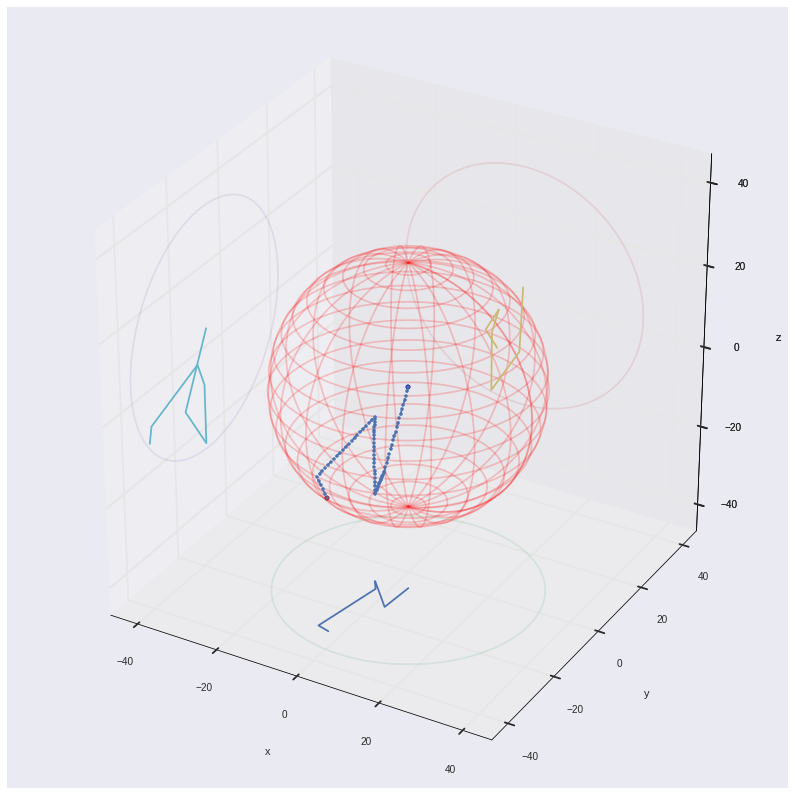

In [328]:
examine_photon(9,30)

[2.0, 8.0, 4.0, 4.0]
4.5


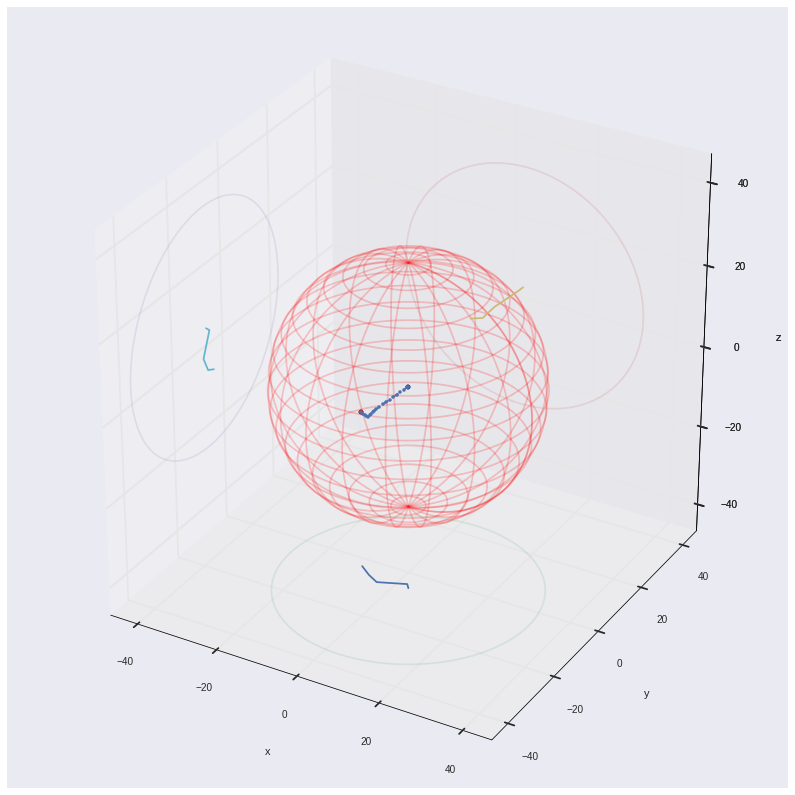

In [333]:
examine_photon(3,30)

In [334]:
photons,lines,position=MonteCarlo(10000)

Results for 10000 Photons
Mean Number of Interactions 4.915900
Mean Length of free paths 9.834135
Escaped Photons: 5580 photons - Ratio: 0.558000


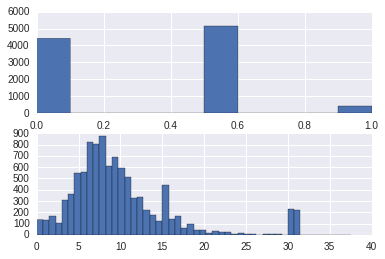

In [335]:
Results(photons,lines)

### Συσχέτιση μεταξύ των παραμέτρων
Για να εκτιμήσουμε τις σχέσεις μεταξύ των παραμέτρων θα τρέξουμε τον αλγόριθμό για δίαφορες ακτίνες αστέρων και για δίαφορες πιθανότητες απορρόφησης και θα κοιτάξουμε αν υπάρχουν συσχετίσεις μεταξύ των παραμέτρων. Στη συνέχεια θα πρέπει να εξετάσουμε θεωρητικά τις συσχετίσεις αυτές για να προσδιορίσουμε αν οφείλονται στη φυσική όποτε όλα λειτουργούν σωστά ή στο μοντέλο και την υλοποιηση του όποτε μπορεί να υπάρχει κάποιο λάθος.

Εξετάζουμε τις παραμέτρους **(μέση τιμή των ελεύθερων διαδρομών, αριθμός αλληλεπιδράσεων, αριθμός φωτονίων που δραπέτευσαν)** σε σχέση με τις ελεύθερες παραμέτρους **(ακτίνα αστέρα, πιθανότητα απορρόφησης)** οπότε θα κατασκευάσουμε για κάθε παράμετρο ενα δισδιάστο πίνακα όπου οι γραμμές είναι οι ακτίνες αστέρα και στήλες είναι οι πιθανότητες απορρόφησης. 

In [172]:
RR = np.linspace(2,100,30)
prob = np.linspace(0.,1.,30)
Nphotons=1000
meanL=np.zeros((RR.shape[0],prob.shape[0]))
Ns=np.zeros((RR.shape[0],prob.shape[0]))
Nd=np.zeros((RR.shape[0],prob.shape[0]))
for i,R in enumerate(RR):
    for j,p in enumerate(prob):
        photons,lines,position=MonteCarlo(Nphotons,absorption_prob=p, R=R)
        mean_paths = [np.mean(k) for k in lines]
        skedasmoi=[len(v) for v in lines]
        
        meanL[i,j]=np.mean(mean_paths)
        Ns[i,j]=np.mean(skedasmoi)
        Nd[i,j]=(Nphotons-photons[photons<0.4].size)

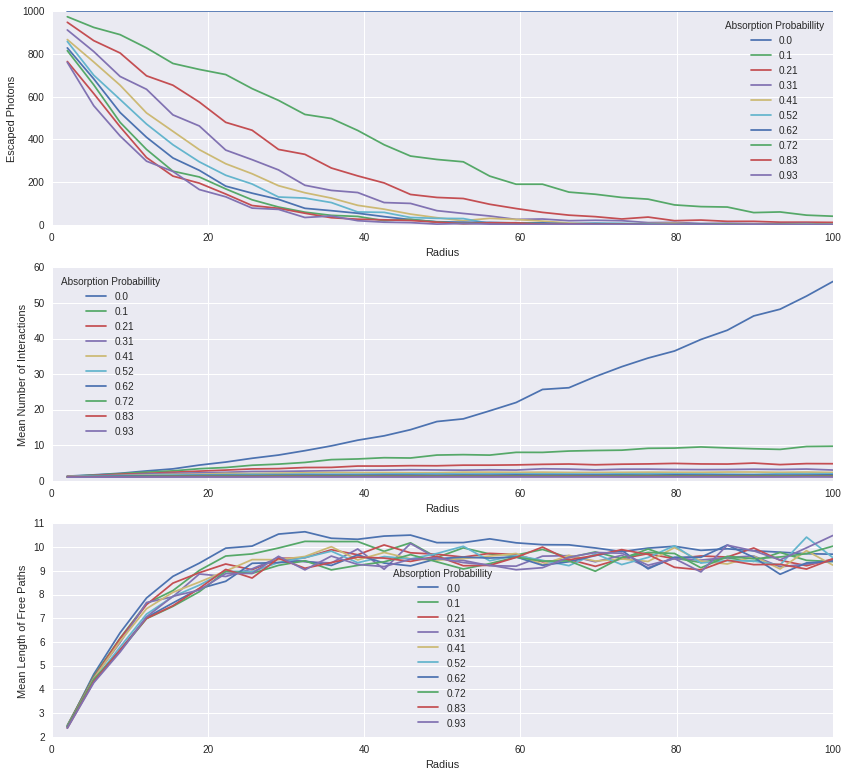

In [186]:
fig=plt.figure(figsize=(14,13))
for i in range(0,len(prob),3):
    ax1=plt.subplot(311)
    ax1.plot(RR,Nd[:,i],label=prob[i].round(2))
    #ax1.set_yscale('log')
    ax1.set_ylabel('Escaped Photons')
    ax1.set_xlabel('Radius')
    ax1.legend(loc='best',title='Absorption Probabillity')
    
    ax2=plt.subplot(312)
    ax2.plot(RR,Ns[:,i],label=prob[i].round(2))
    #ax2.set_yscale('log')
    #ax2.set_xscale('log')
    ax2.set_ylabel('Mean Number of Interactions')
    ax2.set_xlabel('Radius')
    ax2.legend(loc='best',title='Absorption Probabillity')
    
    ax3=plt.subplot(313)
    ax3.plot(RR,meanL[:,i],label=prob[i].round(2))
    ax3.set_ylabel('Mean Length of Free Paths')
    ax3.set_xlabel('Radius')
    ax3.legend(loc='best',title='Absorption Probabillity')

Όλα φαίνονται φυσιολογικά προς το παρον και ισως χωρις να χριεαστει να εξετάσουμε κι αλλες παράμετρους (ή αυτες που θεωρήσαμε εξαρτημενες μεταξύ τους -και ειναι λιγο πολυπλοκο να γίνει -και γι αυατο βαριεμαι τωρα να το κανω :)--)